Imports

In [1]:
from tensorflow import keras
import numpy as np

2023-08-22 19:40:32.657286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 19:40:35.127989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

#### Data Loading

In [5]:
%store -r scaled_distances
%store -r biomass_history_scaled

no stored variable or alias scaled_distances
no stored variable or alias biomass_history_scaled


In [6]:
biomass_history_unscaled = pd.read_csv(r"dataset/Biomass_History.csv")

In [7]:
biomass_history_unscaled.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [8]:
biomass_history_scaled = pd.read_csv('scaled.csv').drop(["Index"], axis = 1)
biomass_history_unscaled = biomass_history_unscaled.drop(["Index"], axis = 1)

In [9]:
biomass_history_scaled.head()

,Unnamed: 0,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.671875,71.3125,0.009598,0.011497,0.010551,0.004887,0.012367,0.008621,0.014374,0.005863
1,1,24.671875,71.4375,0.027206,0.037018,0.029648,0.017548,0.039429,0.035492,0.078674,0.047699
2,2,24.671875,71.5000,0.050751,0.085754,0.065308,0.042999,0.081299,0.055176,0.115173,0.082825
3,3,24.671875,71.5625,0.067871,0.104797,0.090515,0.051239,0.107178,0.091003,0.145020,0.114380
4,4,24.671875,71.6250,0.016586,0.025070,0.025131,0.014526,0.022385,0.024872,0.032166,0.029541


In [10]:
biomass_history_unscaled.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [11]:
location = biomass_history_scaled[["Latitude", "Longitude"]]
time_series_data_scaled = biomass_history_scaled.iloc[:,:7]
y_time_series_data_scaled = biomass_history_scaled[["2017"]]

In [12]:
time_series_data_unscaled = biomass_history_unscaled.iloc[:,2:9]
y_time_series_data_unscaled = biomass_history_unscaled[["2017"]]

#### Data exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


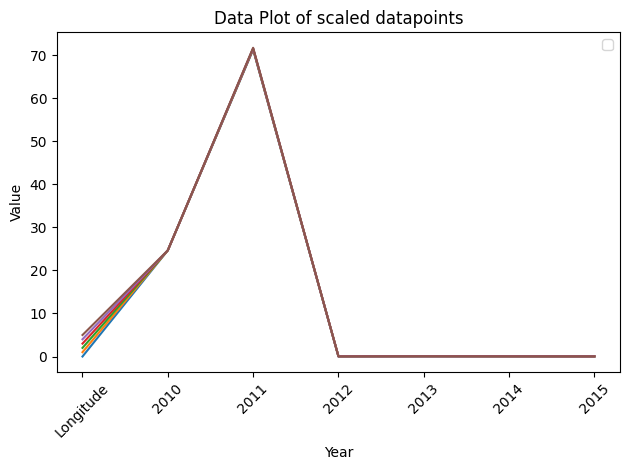

In [13]:
# Extract the years from the column names
years = biomass_history_scaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_scaled.iterrows():
    plt.plot(years, row[:7])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of scaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


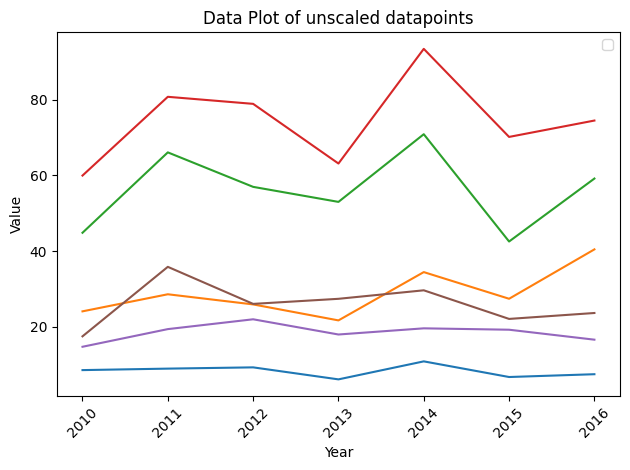

In [14]:
# Extract the years from the column names
years = biomass_history_unscaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_unscaled.iterrows():
    plt.plot(years, row[2:9])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of unscaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Test for stationary points

In [15]:
test_scaled = time_series_data_scaled.iloc[:5,:]
test_unscaled = time_series_data_unscaled.iloc[:5,:]
y_scaled = y_time_series_data_scaled[:5]
y_unscaled = y_time_series_data_unscaled[:5]

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
# function to return if the point is stationary or not

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    #print(dftest)
    
    if dftest[1] < 0.05:
        return True
    else:
        return False

In [18]:
test_unscaled

,2010,2011,2012,2013,2014,2015,2016
0,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925
1,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847
2,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629
3,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720
4,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315


#### Transformations to transform non-stationary point

In [19]:
# function to count number of stationary points, given a dataframe
def number_of_non_stationary_points(dataframe):
    count_of_non_stationary_points = 0
    for row in dataframe.itertuples():

        data = np.cbrt(pd.DataFrame(row[1:])).diff().dropna()

        ad_test_result = ad_test(data)

        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points(time_series_data_scaled)

1732

In [20]:
# function to count number of stationary points using boxcox transformation, given a dataframe
from scipy import stats
def number_of_non_stationary_points_using_boxcox(dataframe):
    count_of_non_stationary_points = 0

    for row in dataframe.itertuples():
        fitted_data, fitted_lambda = stats.boxcox(np.array(row[1:]))
        ad_test_result = ad_test(fitted_data)
        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points_using_boxcox(test_unscaled)

2

### Transforming data using trnsformation

In [21]:
def transform_data(data):

    transformed_data = np.cbrt(data).diff().dropna()

    return transformed_data

In [22]:
data = transform_data(time_series_data_scaled.T).T

In [23]:
y_transformed = np.cbrt(y_time_series_data_scaled)

### Train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, y_transformed, test_size = 0.2, random_state = 0)

In [25]:
X_test

,Latitude,Longitude,2010,2011,2012,2013
2328,-10.503411,1.444788,-4.067707,-0.023836,0.028834,0.006325
1742,-9.240267,1.335356,-3.276898,0.064898,-0.294815,0.147209
810,-6.475257,1.314930,-3.443548,0.010736,-0.092104,-0.014807
2014,-9.853967,1.346712,-3.744342,0.067463,-0.071882,0.080570
618,-5.661790,1.318512,-3.579517,0.006367,0.009741,-0.066992
...,...,...,...,...,...,...
1814,-9.407151,1.366638,-3.538687,0.016158,-0.123081,0.026618
1388,-8.342222,1.312349,-3.492550,0.094765,-0.373718,0.309593
2270,-10.385548,1.434363,-4.073298,0.006411,-0.013270,0.019900
794,-6.413471,1.289511,-3.293848,0.007958,0.002694,-0.092903


## Forecasting

#### Implementing Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.9472045203169803

In [29]:
X_train

,Latitude,Longitude,2010,2011,2012,2013
386,-4.411683,1.296781,-3.562859,0.083146,-0.080364,-0.083534
1735,-9.224129,1.324320,-3.949279,-0.016181,-0.013210,0.038085
459,-4.851423,1.241620,-3.954083,0.001678,0.082066,-0.071969
1129,-7.583103,1.361605,-3.787775,0.008805,-0.021913,-0.026531
1914,-9.633974,1.357607,-3.265454,-0.024989,-0.272365,0.350881
...,...,...,...,...,...,...
1033,-7.275935,1.294532,-3.847321,0.072882,-0.179348,0.099417
1731,-9.214887,1.318163,-3.855269,0.088286,-0.099877,0.011121
763,-6.288146,1.340395,-3.751380,0.033348,-0.038483,-0.047229
835,-6.570189,1.353077,-3.957111,-0.006126,0.003634,-0.031944


In [30]:
y_train

,2017
386,0.560823
1735,0.187391
459,0.156821
1129,0.466096
1914,0.783228
...,...
1033,0.367321
1731,0.259483
763,0.438666
835,0.233329


## Implementing LSTM

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [32]:
import numpy as np

In [33]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(0)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences = True, activation='tanh',input_shape=(len(X_train.columns),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

2023-08-22 19:40:44.020651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 19:40:44.118692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 19:40:44.118998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 6, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 100)            80400     
                                                                 
 dropout_1 (Dropout)         (None, 6, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [34]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


2023-08-22 19:40:49.785847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-08-22 19:40:49.951376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-22 19:40:49.956164: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb208005d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-22 19:40:49.956231: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-08-22 19:40:49.962002: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-22 19:40:50.164137: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

158/158 [==============================] - 8s 20ms/step - loss: 0.0567 - val_loss: 0.0482
Epoch 2/50
158/158 [==============================] - 2s 13ms/step - loss: 0.0514 - val_loss: 0.0479
Epoch 3/50
158/158 [==============================] - 2s 13ms/step - loss: 0.0519 - val_loss: 0.0516
Epoch 4/50
158/158 [==============================] - 2s 14ms/step - loss: 0.0508 - val_loss: 0.0492
Epoch 5/50
158/158 [==============================] - 2s 12ms/step - loss: 0.0506 - val_loss: 0.0478
Epoch 6/50
158/158 [==============================] - 2s 11ms/step - loss: 0.0524 - val_loss: 0.0478
Epoch 7/50
158/158 [==============================] - 2s 12ms/step - loss: 0.0499 - val_loss: 0.0483
Epoch 8/50
158/158 [==============================] - 2s 12ms/step - loss: 0.0513 - val_loss: 0.0488
Epoch 9/50
158/158 [==============================] - 2s 12ms/step - loss: 0.0506 - val_loss: 0.0470
Epoch 10/50
158/158 [==============================] - 2s 13ms/step - loss: 0.0507 - val_loss: 0.0476


#### Predictions

In [35]:
# Predictions
predictions = model.predict(X_train) 

61/61 [==============================] - 1s 5ms/step


In [36]:
predictions

array([[0.6236472 ],
       [0.16833341],
       [0.15277144],
       ...,
       [0.4482603 ],
       [0.21156509],
       [0.7963497 ]], dtype=float32)

In [37]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

   1/1934 [..............................] - ETA: 1:04 - loss: 0.0039

484/484 [==============================] - 2s 4ms/step - loss: 0.0037
Train Loss = 0.0033
Test Loss = 0.0037


In [38]:
# training the model on the whole dataset
model.fit(data, y_transformed, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
197/197 [==============================] - 3s 15ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 2/50
197/197 [==============================] - 3s 16ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 3/50
197/197 [==============================] - 3s 16ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/50
197/197 [==============================] - 3s 15ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 5/50
197/197 [==============================] - 3s 14ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 6/50
197/197 [==============================] - 3s 13ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 7/50
197/197 [==============================] - 3s 14ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
197/197 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0112
Epoch 9/50
197/197 [==============================] - 3s 15ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 10/50
197/197 [==============================] - 3s 15ms/step - loss: 0.0035 - val_lo

## Final Data Prepration 

In [39]:
pred_2018 = model.predict(data) 

 1/76 [..............................] - ETA: 2s

76/76 [==============================] - 0s 6ms/step


In [40]:
pred_2018 =  pd.DataFrame(pred_2018, columns = ['2018'])

In [41]:
data_with_2018 = pd.concat([data, y_transformed, pred_2018], axis=1)

In [42]:
pred_2019 = model.predict(data_with_2018) 
pred_2019 =  pd.DataFrame(pred_2019, columns = ['2019'])

76/76 [==============================] - 2s 7ms/step


In [43]:
biomass_availability_forecasted_data = pd.concat([location, data_with_2018, pred_2019], axis=1)

In [44]:
biomass_availability_forecasted_data

,Latitude,Longitude,Latitude,Longitude,2010,2011,2012,2013,2017,2018,2019
0,24.671875,71.3125,2.911169,1.235715,-3.934369,0.013186,-0.006368,-0.049638,0.180320,0.289257,0.138319
1,24.671875,71.4375,1.911169,1.238137,-3.848543,0.032513,-0.023773,-0.049643,0.362663,0.352692,0.201352
2,24.671875,71.5000,1.651248,1.239346,-3.780277,0.070742,-0.038274,-0.052368,0.435900,0.377438,0.214101
3,24.671875,71.5625,1.468919,1.240555,-3.743817,0.063558,-0.022472,-0.077572,0.485419,0.388696,0.235697
4,24.671875,71.6250,1.323768,1.241764,-3.897907,0.037650,0.000237,-0.048915,0.309130,0.324606,0.395920
...,...,...,...,...,...,...,...,...,...,...,...
2413,20.156250,72.8750,-10.691321,1.455484,-3.996398,-0.000313,-0.009799,-0.041270,0.181948,0.234102,0.498612
2414,20.156250,72.9375,-10.693174,1.456678,-4.126434,0.003002,-0.005945,-0.003954,0.051458,0.118081,0.436896
2415,20.156250,73.0000,-10.695026,1.457871,-4.143912,0.002006,-0.004071,-0.002735,0.035236,0.105436,0.431026
2416,20.156250,73.0625,-10.696878,1.459064,-4.035060,-0.024376,-0.023192,0.001374,0.113890,0.195650,0.461311


In [47]:
biomass_availability_forecasted_data.dtypes

Latitude     float64
Longitude    float64
Latitude     float64
Longitude    float64
2010         float64
2011         float64
2012         float64
2013         float64
2017         float64
2018         float32
2019         float32
dtype: object

In [51]:
biomass_availability_forecasted_data.loc[0,'2018']

0.2892570495605469

## Count function for positive and negative trend

In [65]:
def check(data):
    positive=0
    neg=0
    for i,_ in data.iterrows():
        if(data.loc[i,'2018']>data.loc[i,'2017'] and data.loc[i,'2019']>data.loc[i,'2018']):
            positive+=1
        else:
            neg+=1
    print('Positive tend count : '+str(positive))
    print('Negative trend count : '+str(neg))

In [66]:
check(biomass_availability_forecasted_data)

Positive tend count : 744
Negative trend count : 1674


## Exporting forecasted data

In [62]:
biomass_availability_forecasted_data.to_csv('forecasted.csv')